In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os

In [178]:
from util import RESOURCE_DIR
type_characterization = ['database.xlsx', 'implementation.xlsx', 'implementation_names.xlsx', 'query.xlsx']
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[1]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
len(df)
df.head()

,Projects,Domains,EclipseLink,Spring,JDBC,mybatis,Hibernate,jOOQ,JPA
0,Activiti,automation,0,1,0,1,1,0,1
1,che,software development,1,1,0,1,0,0,1
2,pinpoint,monitoring,0,1,0,1,0,0,0
3,skywalking,monitoring,0,0,0,0,1,0,1
4,storm,hpc,0,1,0,1,0,1,0


In [131]:
data_with_index = df.set_index("Projects")
data_with_index = data_with_index.drop(["ethereumj", "openhab1-addons", "openhab2-addons", "Silence", "docker-client", "riot-android", "zalenium"])
data_with_index = data_with_index.drop(columns='JPA')
data_with_index.head()

,Domains,mybatis,jOOQ,Spring,JDBC,Hibernate,EclipseLink
Projects,,,,,,,
Activiti,automation,1,0,1,0,1,0
airbyte,infrastructure management,0,1,0,0,0,0
airsonic,media,1,0,0,0,0,1
spring-cloud-alibaba,infrastructure management,0,0,1,0,1,0
nacos,infrastructure management,1,0,0,0,0,0


In [132]:
data_jpa = df[["Projects", "Domains", "JPA"]].copy()
data_jpa.iloc[: , 1:].sum().sort_values(ascending=False)

<ipython-input-132-23abc903f391>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_jpa.iloc[: , 1:].sum().sort_values(ascending=False)


JPA    68
dtype: int64

In [133]:
data_with_index.iloc[: , 1:].sum().sort_values(ascending=False)

mybatis        155
Hibernate       94
Spring          45
EclipseLink     14
jOOQ             7
JDBC             0
dtype: int64

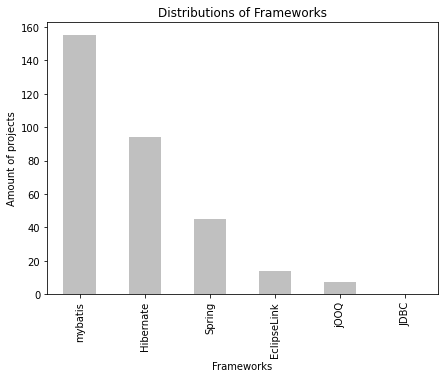

In [134]:
plt.figure(figsize=(7,5))
data_with_index.iloc[: , 1:].sum().sort_values(ascending=False).plot(kind='bar', title="Distributions of Frameworks", color='silver')
plt.xlabel("Frameworks")
plt.ylabel("Amount of projects")
plt.show() 

In [135]:
from util import USAGE_FAN_IN_FILE
df = pd.read_excel(USAGE_FAN_IN_FILE, engine = 'openpyxl')
df.head()
#data_with_index = df.set_index("Projects")
#data_with_index = data_with_index.drop(["ethereumj", "openhab1-addons", "openhab2-addons", "Silence", "docker-client", "riot-android", "zalenium"])
#data_with_index.reset_index(inplace=True)

,Projects,DB-Code(Java),DB-Code(XML),Dependencies,Total-DB,Total-Project,Rate
0,Activiti,77,62,200,339,4890,6.932515
1,che,118,25,282,425,2538,16.745469
2,pinpoint,15,3,17,35,8149,0.429501
3,skywalking,2,3,6,11,2587,0.425203
4,storm,6,1,7,14,3398,0.412007


In [136]:
data_with_index = df.iloc[: , :].sort_values(by='Total-DB', ascending=False)
data_with_index.head()

,Projects,DB-Code(Java),DB-Code(XML),Dependencies,Total-DB,Total-Project,Rate
1,che,118,25,282,425,2538,16.745469
0,Activiti,77,62,200,339,4890,6.932515
2,pinpoint,15,3,17,35,8149,0.429501
4,storm,6,1,7,14,3398,0.412007
3,skywalking,2,3,6,11,2587,0.425203


<AxesSubplot:>

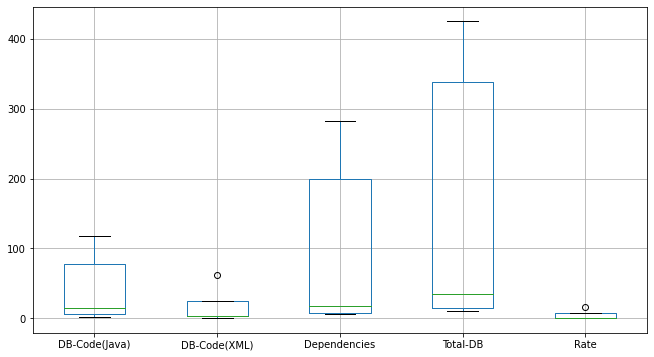

In [137]:
import matplotlib.pyplot as plt
plt.figure(figsize =(11, 6))
df.boxplot(column=['DB-Code(Java)', 'DB-Code(XML)', 'Dependencies', 'Total-DB', 'Rate'])

In [138]:
from apyori import apriori

rules = apriori(data_with_index, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)

results = list(rules)
results = pd.DataFrame(results)
results.head(5)

,items,support,ordered_statistics
0,"((, ))",0.285714,"[(((), ()), 1.0, 3.5), (()), ((), 1.0, 3.5)]"
1,"((, C)",0.285714,"[(((), (C), 1.0, 3.5), ((C), ((), 1.0, 3.5)]"
2,"((, J)",0.142857,"[(((), (J), 0.5, 3.5), ((J), ((), 1.0, 3.5)]"
3,"((, L)",0.142857,"[(((), (L), 0.5, 3.5), ((L), ((), 1.0, 3.5)]"
4,"((, M)",0.142857,"[(((), (M), 0.5, 3.5), ((M), ((), 1.0, 3.5)]"


In [150]:
from mlxtend.frequent_patterns import apriori, association_rules

CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[1]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df = df.iloc[: , 2:]

frq_items = apriori(df, min_support = 0.01, use_colnames = True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values('lift', ascending =False)
rules = rules[rules['consequents'].apply(lambda x: len(x)) == 1]
rules[rules['antecedents'] == {'JPA'}]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(JPA),(EclipseLink),0.206687,0.042553,0.033435,0.161765,3.801471,0.024639,1.142217
10,(JPA),(Spring),0.206687,0.136778,0.063830,0.308824,2.257843,0.035560,1.248917
16,(JPA),(Hibernate),0.206687,0.288754,0.118541,0.573529,1.986223,0.058859,1.667750
2,(JPA),(mybatis),0.206687,0.480243,0.155015,0.750000,1.561709,0.055755,2.079027


In [152]:
USAGE_FAN_IN_FILE_PATH = RESOURCE_DIR + os.sep + "usage_fan_in_file.xlsx"
df_usage_fan_in = pd.read_excel(USAGE_FAN_IN_FILE_PATH, engine = 'openpyxl')

CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[2]
implementation = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')

implementation_usage = pd.merge(implementation, df_usage_fan_in, how = 'inner', on = 'Projects')
implementation_usage = implementation_usage.drop(columns=['Domains', 'DB-Code(Java)', 'DB-Code(XML)', 'Dependencies', 'Total-DB', 'Total-Project' ])
implementation_usage.head()

,Projects,EclipseLink,Spring,JDBC,mybatis,Hibernate,jOOQ,JPA,Rate
0,Activiti,NaN,Spring,NaN,mybatis,Hibernate,NaN,JPA,6.932515
1,che,EclipseLink,Spring,NaN,mybatis,NaN,NaN,JPA,16.745469
2,pinpoint,NaN,Spring,NaN,mybatis,NaN,NaN,NaN,0.429501
3,skywalking,NaN,NaN,NaN,NaN,Hibernate,NaN,JPA,0.425203
4,storm,NaN,Spring,NaN,mybatis,NaN,jOOQ,NaN,0.412007


In [173]:
#implementation_usage = implementation_usage.drop(columns='Projects')

new_frameworks_list = []
new_frameworks_list_string = []

frameworks_list = implementation_usage.iloc[: , 2:7].values.tolist()  

for i in frameworks_list:
    new_frameworks_list_not_null = [x for x in i if pd.isnull(x) == False]
    new_frameworks_list_string = '/'.join([str(item) for item in new_frameworks_list_not_null])
    new_frameworks_list.append(new_frameworks_list_string)

df_implementation_usage = implementation_usage.iloc[: , 8:]
df_implementation_usage = df_implementation_usage.assign(ListFrameworks = new_frameworks_list)

#print(df_implementation_usage)

df_group_implementation_usage = df_implementation_usage.groupby('ListFrameworks')['Rate'].apply(list).reset_index(name='NumberDBFiles')

df_group_implementation_usage.head()

,ListFrameworks,NumberDBFiles
0,Hibernate,[0.4252029377657518]
1,Spring/mybatis,"[16.74546887312845, 0.4295005522149957]"
2,Spring/mybatis/Hibernate,[6.932515337423313]
3,Spring/mybatis/jOOQ,[0.4120070629782225]


<AxesSubplot:>

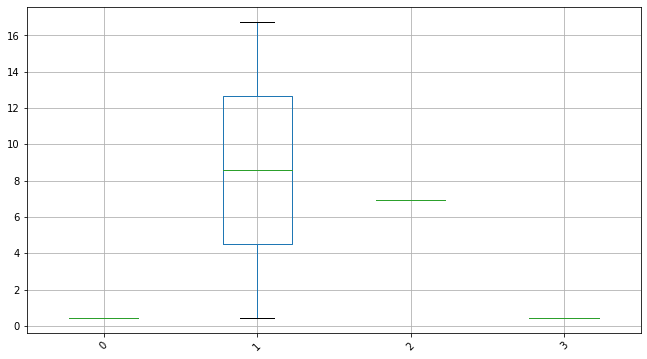

In [175]:
import matplotlib.pyplot as plt

plt.figure(figsize =(11, 6))
df_group_implementation_usage['NumberDBFiles'].apply(lambda x: pd.Series(x)).T.boxplot(figsize=(10,10),rot=45)


In [179]:
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[3]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
len(df)
df.head()

,Projects,Domains,Builder,SQL
0,Activiti,automation,1,1
1,che,software development,0,1
2,pinpoint,monitoring,0,1
3,skywalking,monitoring,1,1
4,storm,hpc,1,1


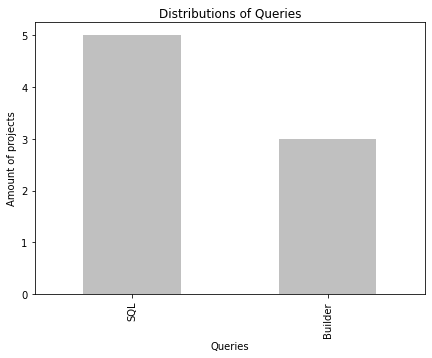

In [186]:
plt.figure(figsize=(7,5))
df.iloc[: , 2:].sum().sort_values(ascending=False).plot(kind='bar', title="Distributions of Queries", color='silver')
plt.xlabel("Queries")
plt.ylabel("Amount of projects")
plt.show()

In [187]:
df.loc[:,'SumPerProject'] = df.sum(axis=1)
df.head()

<ipython-input-187-a1a100043480>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.loc[:,'SumPerProject'] = df.sum(axis=1)


,Projects,Domains,Builder,SQL,SumPerProject
0,Activiti,automation,1,1,2
1,che,software development,0,1,1
2,pinpoint,monitoring,0,1,1
3,skywalking,monitoring,1,1,2
4,storm,hpc,1,1,2
